In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import keras
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from keras.callbacks import ReduceLROnPlateau

In [2]:
data_train = pd.read_csv('train.csv')

Cột y là cột label : với giá trị 1-9
Cột x là cột pixel : với giá trị 0/1 có 28*28 cột

In [3]:
X_train = data_train.iloc[:, 1:]
Y_train = data_train.iloc[:, 0]

In [4]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [6]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train,Y_train

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([1, 0, 1, ..., 7, 6, 9], dtype=int64))

In [7]:
X_train = X_train / 255.0

In [8]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

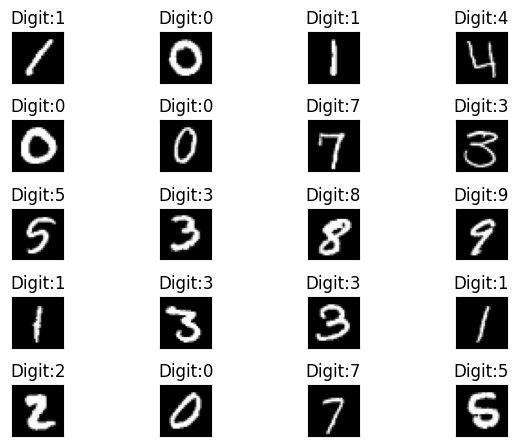

In [9]:
plot_digits(X_train, Y_train)

- Chia x_train và y_train thành 2 phần xdev ,ydev và xval,yval  : phần val = 3%
- Sau đó biến thành ma trận nhị phân


In [10]:
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values

In [11]:
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

padding same : đệm xung quanh để đầu ra có kích thước bằng đầu vào
padding valid : không đệm để kích thước đầu ra nhỏ hơn

In [12]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
for layer in model.layers:
    if isinstance(layer, Conv2D):
        print("Layer Name:", layer.name)
        weights = layer.get_weights()[0]
        print("Kernel Shape:", weights.shape)
        print("Kernels:")
        for i in range(weights.shape[3]):
            kernel = weights[:, :, :, i]
            print(kernel)
            print()

Layer Name: conv2d
Kernel Shape: (5, 5, 1, 6)
Kernels:
[[[-0.17118299]
  [ 0.05545451]
  [-0.09660415]
  [ 0.07670809]
  [-0.11376758]]

 [[-0.0434202 ]
  [ 0.11030163]
  [-0.04566629]
  [ 0.12055053]
  [ 0.1622682 ]]

 [[ 0.17781018]
  [ 0.07898594]
  [-0.09576806]
  [ 0.04755589]
  [ 0.09500147]]

 [[ 0.17296727]
  [ 0.07170422]
  [-0.16279598]
  [ 0.18501164]
  [-0.11208472]]

 [[-0.13644579]
  [ 0.15947326]
  [ 0.04878144]
  [-0.01775159]
  [-0.09587313]]]

[[[ 0.00932322]
  [-0.08930933]
  [-0.10505332]
  [-0.16519111]
  [-0.01141979]]

 [[-0.1833639 ]
  [-0.06462771]
  [-0.12024949]
  [-0.0632846 ]
  [-0.01748715]]

 [[-0.14978409]
  [ 0.04791935]
  [ 0.1510974 ]
  [-0.15463117]
  [ 0.09659816]]

 [[ 0.10840775]
  [-0.05061309]
  [ 0.07332362]
  [-0.15813826]
  [ 0.13819735]]

 [[ 0.08762114]
  [-0.05705185]
  [ 0.12520851]
  [-0.0640893 ]
  [-0.04064414]]]

[[[-0.16704774]
  [-0.00600287]
  [ 0.01766157]
  [ 0.08019136]
  [-0.18210073]]

 [[-0.1134911 ]
  [ 0.05055971]
  [ 0.158

In [14]:
model.build()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       102,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        21,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,666 (498.70 KB)

 Trainable params: 127,666 (498.70 KB)

 Non-trainable params: 0 (0.00 B)

 thiết lập quá trình huấn luyện của mô hình sử dụng thuật toán tối ưu hóa quá trình cập nhật trọng số Adam với tỷ lệ học là 5e-4
 - hàm mất mát (loss function) được chọn là categorical_crossentropy (mô hình dự đoán trong đó các đầu vào được chỉ định là một trong nhiều hơn hai lớp.)
 - cùng với các độ đo (metrics) là accuracy để đánh giá hiệu suất của mô hình.

categorical_crossentropy với p và q là rời rạc (như y - nhãn thật sự và y^ - nhãn dự đoán )  và C là số lượng các class cần phân lớp
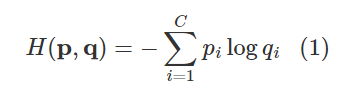

accuracy : tp : tổng số trường hợp dự báo khớp positive ; tn Tổng số trường hợp dự báo khớp Negative

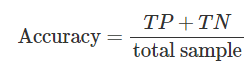

In [15]:
adam = Adam(learning_rate=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

Đoạn mã này tạo ra một callback để giảm learning rate (tỷ lệ học) khi không có sự cải thiện đáng kể trong quá trình huấn luyện. Dưới đây là ý nghĩa của các tham số:

- monitor: Tham số này xác định đại lượng mà ta muốn theo dõi để quyết định liệu cần giảm learning rate hay không. Trong trường hợp này, val_acc được sử dụng, tức là độ chính xác trên tập validation.

- patience: Số lượng epochs mà mô hình có thể không có cải thiện trước khi learning rate được giảm. Trong trường hợp này, nếu không có cải thiện trong độ chính xác trên tập validation trong 3 epochs liên tiếp, learning rate sẽ được giảm.

- verbose: Xác định cách thức thông báo khi learning rate được giảm. Giá trị 1 có nghĩa là thông báo sẽ được in ra.

- factor: Hệ số giảm learning rate. Khi learning rate được giảm, nó sẽ được nhân với hệ số này. Trong trường hợp này, learning rate sẽ được giảm đi 1/5 (tức là learning rate mới sẽ bằng 20% của learning rate cũ) khi không có cải thiện sau patience epochs.

- min_lr: Giới hạn dưới cho learning rate. Learning rate sẽ không được giảm xuống dưới giới hạn này.

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [17]:
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_dev)

Dùng để huấn luyện mô hình 
-  sử dụng dữ liệu đã được chuẩn bị trước (X_dev và T_dev) và dữ liệu validation (X_val và T_val)
- số bước mỗi epoch là số lượng mẫu /100
- epoch : số lần lặp mô hình huấn luyện 
- validation_data : đánh giá mô hình

In [18]:
model.fit(datagen.flow(X_dev, T_dev, batch_size=100), 
                    steps_per_epoch=len(X_dev) // 100, 
                    epochs=30, 
                    validation_data=(X_val, T_val), 
                    callbacks=[reduce_lr])

Epoch 1/30
  1/407 ━━━━━━━━━━━━━━━━━━━━ 10:04 1s/step - accuracy: 0.0700 - loss: 2.3113

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


407/407 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6413 - loss: 1.1602 - val_accuracy: 0.9627 - val_loss: 0.1475 - learning_rate: 5.0000e-04
Epoch 2/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - accuracy: 0.9500 - loss: 0.1081 - val_accuracy: 0.9611 - val_loss: 0.1473 - learning_rate: 5.0000e-04
Epoch 3/30
  1/407 ━━━━━━━━━━━━━━━━━━━━ 48s 120ms/step - accuracy: 0.9300 - loss: 0.2441

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9380 - loss: 0.2039 - val_accuracy: 0.9698 - val_loss: 0.1027 - learning_rate: 5.0000e-04
Epoch 4/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 154us/step - accuracy: 0.9600 - loss: 0.0510 - val_accuracy: 0.9690 - val_loss: 0.1029 - learning_rate: 5.0000e-04
Epoch 5/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9563 - loss: 0.1418 - val_accuracy: 0.9802 - val_loss: 0.0851 - learning_rate: 5.0000e-04
Epoch 6/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step - accuracy: 0.9500 - loss: 0.1279 - val_accuracy: 0.9786 - val_loss: 0.0886 - learning_rate: 5.0000e-04
Epoch 7/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9606 - loss: 0.1252 - val_accuracy: 0.9770 - val_loss: 0.0899 - learning_rate: 5.0000e-04
Epoch 8/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step - accuracy: 0.9500 - loss: 0.0563 - val_accuracy: 0.9786 - val_loss: 0.0841 - learning_rate: 5.0000e-04
Epoch 9/30
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0

Predict test data

In [19]:
df_test = pd.read_csv('test.csv')
X_test = np.array(df_test)
X_test = X_test/255.0

In [20]:
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
Y_test = np.argmax(Y_test, axis=1)

In [22]:
df_out = pd.read_csv('sample_submission.csv')
df_out['Label'] = Y_test
df_out.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [23]:
df_out.to_csv('out.csv', index=False)